# Packages

In [1]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [3]:
import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT



# R Different Populations

In [4]:
%%R
install.packages("sampling")
library(sampling)

* installing *source* package ‘sampling’ ...
** package ‘sampling’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0’
installing to /home/divar/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-sampling/00new/sampling/libs
** R


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=/usr/src/r-base-4.3.3-2build2 -Wdate-time -D_FORTIFY_SOURCE=3  -c init.c -o init.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=/usr/src/r-base-4.3.3-2build2 -Wdate-time -D_FORTIFY_SOURCE=3  -c str.c -o str.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -flto=auto -ffat-lto-objects -Wl,-z,relro -o sampling.so init.o str.o -L/usr/lib/R/lib -lR


** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sampling)


Installing package into ‘/home/divar/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/sampling_2.10.tar.gz'
Content type 'application/x-gzip' length 574173 bytes (560 KB)
downloaded 560 KB


The downloaded source packages are in
	‘/tmp/RtmpLfFt2B/downloaded_packages’
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/local/lib/R/site-library’ contains no packages


In [5]:
ro.r('library(sampling)')
ro.r('n_percent = .05')


sampling = importr('sampling')
ro.r('library(sampling)')


ro.r('x1 = swiss$Education')
ro.r('y1 = swiss$Examination')




#ro.r('rand_seed = sample(length(x1))')
#ro.r('x1 = x1[rand_seed]')
#ro.r('y1 = y1[rand_seed]')

x1 = np.array(ro.r('x1'))
y1 = np.array(ro.r('y1'))

ro.r('N1 = length(x1)')
N1 = ro.r('N1')
ro.r('n1 = round(n_percent * N1)')
n1 = ro.r('n1')
ro.r('inclusions1 = inclusionprobabilities(x1, n1)')

inclusions1 = ro.r("inclusions1")

inclusions1[inclusions1 == 0] = 1e-4
print(np.corrcoef(x1, y1)[0,1])





# SWISS
#https://search.r-project.org/CRAN/refmans/sampling/html/swissmunicipalities.html
ro.r('data(swissmunicipalities)')
ro.r('y2 = swissmunicipalities$Airbat')
ro.r('x2 = swissmunicipalities$Pop020')
ro.r('v2 = swissmunicipalities$Airind')
ro.r('h2 = swissmunicipalities$H00P01')
ro.r('w2 = swissmunicipalities$H00P04')


x2 = np.array(ro.r('x2'))
y2 = np.array(ro.r('y2'))
v2 = np.array(ro.r('v2'))
w2 = np.array(ro.r('w2'))
h2 = np.array(ro.r('h2'))

ro.r('N2 = length(x2)')
N2 = ro.r('N2')
ro.r('n2 = round(n_percent * N2)')
n2 = ro.r('n2')
ro.r('inclusions2 = inclusionprobabilities(x2, n2)')
inclusions2 = ro.r("inclusions2")

inclusions2[inclusions2 == 0] = 1e-4
print(np.corrcoef(x2, y2)[0,1])






#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')


x3 = np.array(ro.r('x3'))
y3 = np.array(ro.r('y3'))
v3 = np.array(ro.r('v3'))
w3 = np.array(ro.r('w3'))
h3 = np.array(ro.r('h3'))

ro.r('N3 = length(x3)')
N3 = ro.r('N3')
ro.r('n3 = round(n_percent * N3)')
n3 = ro.r('n3')
#ro.r('inclusions3 = inclusionprobabilities(x3 + runif(N3, -1,1), n3)')
ro.r('inclusions3 = inclusionprobabilities(x3, n3)')

inclusions3 = ro.r("inclusions3")
inclusions3[inclusions3 == 0] = 1e-4
ro.r('print(cor(x3,y3))')






#simu
ro.r('x4 = rnorm(100, 200, 5)')
ro.r('y4 = x4 + runif(100, -5, 5)')
ro.r('z4 = x4 + runif(100, -5, 5)')

ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x4))')
ro.r('x4 = x4[rand_seed]')
ro.r('y4 = y4[rand_seed]')
ro.r('z4 = z4[rand_seed]')

x4 = np.array(ro.r('x4'))
y4 = np.array(ro.r('y4'))
z4 = np.array(ro.r('z4'))

ro.r('N4 = length(x4)')
N4 = ro.r('N4')
ro.r('n4 = round(n_percent * N4)')
n4 = ro.r('n4')
ro.r('inclusions4 = inclusionprobabilities(x4, n4)')
inclusions4 = ro.r("inclusions4")
inclusions4[inclusions4 == 0] = 1e-4





#MU284 Sweden
ro.r('data(MU284)')
ro.r('y5 = MU284$RMT85')
ro.r('x5 = MU284$P85')
ro.r('g5 = MU284$P75')
ro.r('v5 = MU284$S82')
ro.r('h5 = MU284$ME84')
ro.r('w5 = MU284$REV84')



y5 = np.array(ro.r('y5'))
x5 = np.array(ro.r('x5'))
g5 = np.array(ro.r('g5'))
v5 = np.array(ro.r('v5'))
h5 = np.array(ro.r('h5'))
w5 = np.array(ro.r('w5'))


ro.r('N5 = length(x5)')
N5 = ro.r('N5')
ro.r('n5 = round(n_percent * N5)')
n5 = ro.r('n5')
ro.r('inclusions5 = inclusionprobabilities(x5, n5)')
inclusions5 = ro.r("inclusions5")
inclusions5[inclusions5 == 0] = 1e-4



#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')



#small simu
ro.r('x6 = c(1,2,3,4,5,6,7,8,9,10)')
ro.r('y6 = c(10,27,30,4,57,60,70,83,80,130)')

x6 = np.array(ro.r('x6'))
y6 = np.array(ro.r('y6'))

ro.r('N6 = length(x6)')
N6 = ro.r('N6')
ro.r('n6 = 3')
n6 = ro.r('n6')
ro.r('inclusions6 = inclusionprobabilities(x6, n6)')
inclusions6 = ro.r("inclusions6")
inclusions6[inclusions6 == 0] = 1e-4



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/local/lib/R/site-library’ contains no packages



0.6984152962884828
0.9421664139113467
[1] 0.9750693


In [ ]:
%%R
swiss_big = 0
swiss_small = 0
if (swiss_big == 1){
# Swiss
data(swissmunicipalities)
y2 = swissmunicipalities$Airbat
x2 = swissmunicipalities$Pop020
v2 = swissmunicipalities$Airind
h2 = swissmunicipalities$H00P01
w2 = swissmunicipalities$H00P04
N = length(y2)
n_percent = .05
n = round(n_percent * N)
n = 10


#1 Great
y <- y2; z <- x2; p <- h2

}


if (swiss_small == 1){
# Swiss
print(cor(swiss))
x1 = -swiss$Education
y1 = -swiss$Examination
h1 = swiss$Agriculture
N = length(y1)
n_percent = .05
n = round(n_percent * N)
n = 5


#1 Great
y <- y1; z <- x1; p <- h1

}


Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'swiss_small' not found


RInterpreterError: Failed to parse and evaluate line 'swiss_big = 0\nif (swiss_big == 1){\n# Swiss\ndata(swissmunicipalities)\ny2 = swissmunicipalities$Airbat\nx2 = swissmunicipalities$Pop020\nv2 = swissmunicipalities$Airind\nh2 = swissmunicipalities$H00P01\nw2 = swissmunicipalities$H00P04\nN = length(y2)\nn_percent = .05\nn = round(n_percent * N)\nn = 10\n\n\n#1 Great\ny <- y2; z <- x2; p <- h2\n\n}\n\n\nif (swiss_small == 1){\n# Swiss\nprint(cor(swiss))\nx1 = -swiss$Education\ny1 = -swiss$Examination\nh1 = swiss$Agriculture\nN = length(y1)\nn_percent = .05\nn = round(n_percent * N)\nn = 5\n\n\n#1 Great\ny <- y1; z <- x1; p <- h1\n\n}\n'.
R error message: "Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : \n  object 'swiss_small' not found"

# Simu The best

## R Popu

In [ ]:
%%R

library(sampling)

#MU284 Sweden
data(MU284)
MU284 = MU284[MU284$P85<200,]
set.seed(120)
MU284 = MU284[sample(length(MU284[,1])),]
y5 = MU284$RMT85
x5 = MU284$P85/100
g5 = MU284$P75/100
v5 = MU284$S82/1000
h5 = MU284$ME84/1000
w5 = MU284$REV84/1000


RMT85 = MU284$RMT85
P85 = MU284$P85/100
P75 = MU284$P75/100
S82 = MU284$S82/1000
ME84 = MU284$ME84/1000
REV84 = MU284$REV84/1000
REG = MU284$REG

N = length(REV84)
n = 14
r <- runif(N, .1, .8)
e <- rep (1, N)




y <- P85; z <- ME84 ; p <- P75 # be rahe!
# y <- P85; z <- ME84 ; p <- S82
# y <- P85; z <- ME84 ; p <- REG
# y <- P85; z <- ME84 ; p <- e 


# y <- P85; z <- REV84; p <- P75 # be rahe!
# y <- P85; z <- REV84; p <- S82
# y <- P85; z <- REV84; p <- REG
# y <- P85; z <- REV84; p <- e 


pik <- inclusionprobabilities(p, n)
pik[pik>1] = 1
pik[pik==0] = 1e-4

print(c(N, n))
##########################
### Variance of Rivals ###
##########################
pikl_sys = UPsystematicpi2(pik)
pikl_max = UPmaxentropypi2(pik)
pikl_mid = UPmidzunopi2(pik)
pikl_til = UPtillepi2(pik)

z_hat = z / pik

var__sys <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__max <- t(z_hat) %*% (pikl_max - (pik %*% t(pik))) %*% z_hat
var__mid <- t(z_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% z_hat
var__til <- t(z_hat) %*% (pikl_til - (pik %*% t(pik))) %*% z_hat
var__srs <- (N**2)*(1-n/N)*(1/n)*var(z)

y_hat = y/pik

var__sys_y <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
var__max_y <- t(y_hat) %*% (pikl_max - (pik %*% t(pik))) %*% y_hat
var__mid_y <- t(y_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% y_hat
var__til_y <- t(y_hat) %*% (pikl_til - (pik %*% t(pik))) %*% y_hat
var__srs_y <- (N**2)*(1-n/N)*(1/n)*var(y)




var_z = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z) = c('sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
threshold_z = min(var_z[var_z>0])

var_y = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y )
names(var_y) = c('sysy', 'maxy', 'midy', 'tily', 'srsy')
threshold_y = min(var_y[var_y>0])



#################################
############ Plots and Prints ###
#################################
if(1==0){
  par(mfrow=c(2,3))
  plot(y, z)
  plot(p, z)
  plot(p, y)
  
  plot(z_hat, y_hat)
  plot(p/pik, y_hat)
  
  plot(p/pik, z_hat)
  par(mfrow=c(2,3))
#cat('x,y', cor(x,y), '\n x,z', cor(z, x), '\n y,z', cor(z, y), "\n")
plot(y, z)
plot(p,z)
plot(p,y)

plot(z_hat,y_hat)
plot(p/pik,y_hat)

plot(p/pik,z_hat)


cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(p,z), "z_NHT, y_NHT", cor(z/pik,y/pik))

z_hat = z/pik
print(var_z)
print(var_y)
cat("x threshold", threshold_z, "\n", "y threshold", threshold_y, "\n")


#cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(x,z), "z_NHT, y_NHT", cor(z/pik,y/pik))
Final_result = cbind(y,z, y_hat, z_hat, pik, abs((y_hat- z_hat)/y_hat))

print(c(N,n))

}


[1] 281  14


In [ ]:
%%R
M = 1000

cube_estimatieon_x = array(0, M)
cube_estimatieon_y = array(0, M)

for(m in 1:M) {
    cube_sample = samplecube(cbind(pik,z), pik, comment=FALSE)
    cube_estimatieon_x[m] = sum(x[cube_sample==1]/pik[cube_sample==1])
    cube_estimatieon_y[m] = sum(y[cube_sample==1]/pik[cube_sample==1])


}
var__cub_y = round(var(cube_estimatieon_y), 2)
var__cub_x = round(var(cube_estimatieon_x), 2)

var_y_0 = c(var__cub_y, var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)
names(var_y_0) = c('cubzy', 'syszy', 'maxzy', 'midzy', 'tilzy', 'srszy')

var_z_0 = c(var__cub_x, var__sys, var__max, var__mid, var__til, var__srs)
names(var_z_0) = c('cubz', 'sysz', 'maxz', 'midz', 'tilz', 'srsz')

threshold_z = min(var_z_0[-1])
threshold_y = min(var_y_0[-1])
cat('cor x,y', round(cor(p, y),3), 'cor x,z', round(cor(p, z),3),'cor y,z', round(cor(y, z),3), '\n')
print(round(var_y_0, 2))
print(round(var_z_0, 2))
cat('cube eff z and y', c(round(min(var_z_0[-1])/var_z_0['cubz'], 2),round(min(var_y_0[-1])/var_y_0['cubxy'], 2)), '\n')


Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'x' not found


RInterpreterError: Failed to parse and evaluate line "M = 1000\n\ncube_estimatieon_x = array(0, M)\ncube_estimatieon_y = array(0, M)\n\nfor(m in 1:M) {\n    cube_sample = samplecube(cbind(pik,z), pik, comment=FALSE)\n    cube_estimatieon_x[m] = sum(x[cube_sample==1]/pik[cube_sample==1])\n    cube_estimatieon_y[m] = sum(y[cube_sample==1]/pik[cube_sample==1])\n\n\n}\nvar__cub_y = round(var(cube_estimatieon_y), 2)\nvar__cub_x = round(var(cube_estimatieon_x), 2)\n\nvar_y_0 = c(var__cub_y, var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)\nnames(var_y_0) = c('cubzy', 'syszy', 'maxzy', 'midzy', 'tilzy', 'srszy')\n\nvar_z_0 = c(var__cub_x, var__sys, var__max, var__mid, var__til, var__srs)\nnames(var_z_0) = c('cubz', 'sysz', 'maxz', 'midz', 'tilz', 'srsz')\n\nthreshold_z = min(var_z_0[-1])\nthreshold_y = min(var_y_0[-1])\ncat('cor x,y', round(cor(p, y),3), 'cor x,z', round(cor(p, z),3),'cor y,z', round(cor(y, z),3), '\\n')\nprint(round(var_y_0, 2))\nprint(round(var_z_0, 2))\ncat('cube eff z and y', c(round(min(var_z_0[-1])/var_z_0['cubz'], 2),round(min(var_y_0[-1])/var_y_0['cubxy'], 2)), '\\n')\n".
R error message: "Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : \n  object 'x' not found"

In [ ]:
%%R
M = 1000
NN = 280
nn = 14
yy = runif(NN, 0, 30)
xx = yy + runif(NN, 0, 5)
zz = yy + runif(NN, 0, 5)
print(c(cor(yy, xx), cor(yy, zz), cor(xx, zz)))
pikk = inclusionprobabilities(xx, nn)

cube_estimatieon_zz = array(0, M)
cube_estimatieon_yy = array(0, M)

for(m in 1:M) {
    cube_sample = samplecube(cbind(pikk,zz), pikk, comment=FALSE)
    cube_estimatieon_zz[m] = sum(zz[cube_sample==1]/pikk[cube_sample==1])
    cube_estimatieon_yy[m] = sum(yy[cube_sample==1]/pikk[cube_sample==1])
}
var__cub_y = round(var(cube_estimatieon_yy), 2)
var__cub_z = round(var(cube_estimatieon_zz), 2)
print(c(var__cub_y, var__cub_z))
print(c(NN**2*(1-nn/NN)*(1/nn)*var(yy), NN**2*(1-nn/NN)*(1/nn)*var(zz)))
warnings()

UsageError: Cell magic `%%R` not found.


## Astar

In [ ]:
y = np.array(ro.r['y'])
z = np.array(ro.r['z'])

n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
var_z_0 = np.array(ro.r['var_z_0'])

inclusions = np.array(ro.r['pik'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_y = ro.r['threshold_y']
inclusions = np.array(inclusions)


max_open_set_size      = 20000
switch_coefficient     = .5
num_initial_nodes      = 10000
initial_design_to_use  = 1
show_results           = 1
max_iterations         = 1000
random_restart_period  = 100   # how often to inject random designs
random_injection_count = 10    # how many random designs to inject
prune_fraction         = .9
var_percent_exected    = .1



import numpy as np
rng = np.random.default_rng()  # define your random generator here if you want

for num_changes in [10]:
    for num_new_nodes in [10]:
        print(max_iterations, num_new_nodes, max_open_set_size, num_changes, switch_coefficient)
        # If you want a random permutation for the classic case
        Design = Design(inclusions=inclusions)
        criterion = VarNHT(main_variable=y, auxiliary_variable=x, inclusion_probability=inclusions)
        astar = AStar(
            inclusions=inclusions, 
            num_initial_nodes=num_initial_nodes,
            initial_design_to_use=initial_design_to_use,
            criteria=criterion,
            z = z,
            y = y,
            threshold_z=threshold_z,
            threshold_y=threshold_y,
            switch_coefficient=switch_coefficient, 
            show_results=show_results, 
            var_percent_exected=var_percent_exected
        )
        result = astar.run(
            max_iterations=max_iterations,
            num_new_nodes=num_new_nodes,
            max_open_set_size=max_open_set_size,
            num_changes=num_changes,
            random_restart_period=random_restart_period,
            random_injection_count=random_injection_count,
            prune_fraction=prune_fraction
        )
        print("Best criteria value:", astar.best_criteria_value)
        print("Iterations run:", result)
        print(np.round(var_z_0, 1))
        print(np.round(var_y_0, 1))
        astar.initial_design.show()
        astar.best_design.show()

1000 10 20000 10 0.5


Generating initial designs:   0%|          | 8/10000 [00:00<02:13, 75.11it/s]

Initial design 0: efficiency x=1.0000, y=1.0000
New best at idx=0: efficiency x = 1.0000 and efficiency y = 1.0000
New best at idx=1: efficiency x = 1.0734 and efficiency y = 0.8891
New best at idx=15: efficiency x = 1.2269 and efficiency y = 1.0764


Generating initial designs:   0%|          | 44/10000 [00:00<01:32, 107.30it/s]

New best at idx=31: efficiency x = 1.2280 and efficiency y = 0.6856
New best at idx=34: efficiency x = 1.4155 and efficiency y = 0.7183


Generating initial designs:   1%|          | 89/10000 [00:00<01:44, 95.20it/s] 

New best at idx=75: efficiency x = 1.5652 and efficiency y = 0.6701


Generating initial designs:  52%|█████▏    | 5196/10000 [00:50<00:50, 95.47it/s] 

New best at idx=5189: efficiency x = 1.5953 and efficiency y = 1.5459


Generating initial designs: 100%|██████████| 10000/10000 [01:33<00:00, 106.77it/s]



Progress: 0.0% 
=== Best Solution Updated at Iteration 0 ===
  Best Cost (x):       5430.055
  Best Cost (y):       1.3031
  Criteria Value:      5430.055
  Efficiency x (0→f):  1.595 → 1.598
  Efficiency y (0→f):  [1.546] → [1.5215]
  Alpha:               0.5
  Design Depth:        10
  Design Size (|D|):   236
  Open set size:       2


=== Best Solution Updated at Iteration 0 ===
  Best Cost (x):       5419.019
  Best Cost (y):       1.285
  Criteria Value:      5419.019
  Efficiency x (0→f):  1.595 → 1.601
  Efficiency y (0→f):  [1.546] → [1.5429]
  Alpha:               0.5
  Design Depth:        10
  Design Size (|D|):   236
  Open set size:       3

Progress: 0.1% 
=== Best Solution Updated at Iteration 1 ===
  Best Cost (x):       5419.019
  Best Cost (y):       1.285
  Efficiency x (0→f):  1.595 → 1.6011734
  Efficiency y (0→f):  [1.546] → [1.5429448]
  Alpha:               0.5
  Design Depth:        20
  Design Size (|D|):   250
  Open set size:       19

Progress: 2.0% 
=== 

KeyboardInterrupt: 

In [ ]:
from datetime import datetime
import os

# Create timestamped filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path = f"/home/divar/projects/geometric-sampling/Bardia GFS/results/result_{timestamp}.txt"

# Optional: make sure the directory exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Result string to write
result_str = f"""
=== Run at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ===
y <- P85; z <- ME84; p <- S82, n = 5, efficiency of cube sampling x 3.07 
efficiency of cube sampling y 2.87
max_open_set_size      = 20000
switch_coefficient     = .5
num_initial_nodes      = 10000
initial_design_to_use  = 1
show_results           = 1
max_iterations         = 1000
random_restart_period  = 100
random_injection_count = 10
prune_fraction         = .9
var_percent_exected    = .1

=== Best Solution Updated at Iteration 999 ===
  Best Cost (x):       4944.259
  Best Cost (y):       141.3556
  Efficiency x (0→f):  2.676 → 3.2571587
  Efficiency y (0→f):  [2.495] → [2.9263103]
  Alpha:               0.5
  Design Depth:        3220
  Design Size (|D|):   2457
  Open set size:       8156

Best criteria value: 4944.258565789535
Iterations run: 1000
[ 5238.6 20272.3 17619.5 16104.2 17598.7 33345.9]
[144.2 519.7 453.1 413.7 452.5 899.9]
"""

# Write the result to the file
with open(file_path, "w") as f:
    f.write(result_str + "\n")

print(f"Results saved to {file_path}")


Results saved to /home/divar/projects/geometric-sampling/Bardia GFS/results/result_20250601_202418.txt


In [ ]:
import numpy as np
rho = .9
x = np.random.normal(0, 1, 100)  # Example auxiliary variable
# x: your auxiliary variable (numpy array, standardized or not)
# rho: desired correlation (float between -1 and 1)
rng = np.random.default_rng()
x = np.asarray(x)

# Step 1: Standardize x
x_std = (x - np.mean(x)) / np.std(x)

# Step 2: Simulate pseudo-y with given correlation
n = len(x)
z = rng.normal(0, 1, n)
pseudo_y = rho * x_std + np.sqrt(1 - rho**2) * z
np.corrcoef(x, pseudo_y)[0, 1]  # Check correlation
# (Optional) Rescale pseudo_y (if you want it to mean/match the scale of x)
# pseudo_y = np.mean(x) + np.std(x) * pseudo_y

# Now you can sort by pseudo_y / trial designs as if you had a hidden y with corr(x, y)=rho!

np.float64(0.8928480290070486)

In [ ]:
# ------- Test -------
inclusions = np.array([.2, .3, .44, .86, .2])
print("\n=== Case 1: Classical (no perm, no delta) ===")
d1 = Design(inclusions=inclusions, delta=1.0)
for sample in d1: print(sample)
print("\n=== Case 2: Permuted classical (perm, no delta) ===")
perm = np.random.permutation(len(inclusions))
d2 = Design(inclusions=inclusions, perm=perm, delta=1.0)
for sample in d2: print(sample)
print("\n=== Case 3: Atomized (delta<1), FULL cumulative logic on permuted atoms ===")
d3 = Design(inclusions=inclusions, delta=0.05)
for sample in d3: print(sample)


=== Case 1: Classical (no perm, no delta) ===


TypeError: Design.__init__() got an unexpected keyword argument 'delta'

## Some needed 

In [ ]:
import numpy as np

inclusions = np.array([.2,.3,.45,.85,.2])
perm = np.random.permutation(len(inclusions))

# Classical
d1 = Design(inclusions=inclusions, delta=1.0)
# Permuted classical
d2 = Design(inclusions=inclusions, perm=perm, delta=1.0)
# Exploded, atomized, permuted
d3 = Design(inclusions=inclusions, perm=perm, delta=0.9)

for sample in d3:
    print(sample)

Sample(probability=np.float64(0.3), ids=frozenset({2, 3}))
Sample(probability=np.float64(0.3), ids=frozenset({1, 3}))
Sample(probability=np.float64(0.15), ids=frozenset({2, 4}))
Sample(probability=np.float64(0.05), ids=frozenset({3, 4}))
Sample(probability=np.float64(0.2), ids=frozenset({0, 3}))


In [ ]:
permuted_inclusions = inclusions[perm]
exploded_inclusions, exploded_perm = self.explode(permuted_inclusions, delta)
original_unit_indices = [perm[i] for i in exploded_perm]
self.perm = original_unit_indices
self.push_initial_design(exploded_inclusions, self.perm)

NameError: name 'self' is not defined

In [ ]:
inclusions = np.array([.2,.3,.45,.85,.2])
perm = np.random.permutation(len(inclusions))
d = Design(inclusions=inclusions, perm=perm)

for sample in d:
     print(sample)

In [ ]:
# import pickle

# # Save to a file
# with open("best_design.pkl", "wb") as f:
#     pickle.dump(astar.best_design, f)

In [ ]:
# import pickle

# with open("best_design.pkl", "rb") as f:
#     loaded_best_design = pickle.load(f)

In [ ]:
# with open("best_run.pkl", "wb") as f:
#     pickle.dump({
#         "design": astar.best_design,
#         "criteria_value": astar.best_criteria_value,
#         # any other info...
#     }, f)

In [ ]:
import pickle

with open("best_design.pkl", "rb") as f:
    loaded_best_design = pickle.load(f)

In [ ]:
loaded_best_design

In [ ]:
print(len(getattr(astar.best_design, 'heap', [])))
print(len(getattr(astar.best_design.merge_identical(),'heap', [])))

count = 0
for sample in astar.best_design:
    count += 1
print("Number of samples in the best design:", count)


6377
0
Number of samples in the best design: 6377


In [ ]:
astar.best_design.merge_identical()  # This merges identical samples
print(len(astar.best_design.heap))   # Now prints the number of samples after merging

# Or, to be clear:
count = 0
for sample in astar.best_design:
    count += 1
print("Number of samples in the best design after merging:", count)

6377
Number of samples in the best design after merging: 6377


In [ ]:
print("Before merging:")
all_samples = list(astar.best_design.heap)
print("Number of samples:", len(all_samples))
print("Sample IDs:", [s.ids for s in all_samples[:10]])

astar.best_design.merge_identical()  # Merges identical samples

print("\nAfter merging:")
all_samples = list(astar.best_design.heap)
print("Number of samples:", len(all_samples))
print("Sample IDs:", [s.ids for s in all_samples[:10]])

Before merging:
Number of samples: 6377
Sample IDs: [frozenset({2, 259, 4, np.int64(37), np.int64(264), np.int64(11), np.int64(213), np.int64(88), np.int64(187), 92}), frozenset({200, 169, np.int64(110), 47, np.int64(241), np.int64(210), 51, 21, np.int64(158), np.int64(191)}), frozenset({97, 162, 226, np.int64(167), 9, 106, 107, 209, 221, 94}), frozenset({np.int64(73), 74, 139, np.int64(42), 272, 276, 213, 182, 279, 219}), frozenset({130, 194, 5, 38, 10, 119, 88, 249, 58, 252}), frozenset({97, 162, 226, np.int64(167), 9, np.int64(106), np.int64(205), 209, 221, 94}), frozenset({np.int64(42), 139, np.int64(78), np.int64(206), np.int64(112), np.int64(18), 276, 279, np.int64(219), np.int64(159)}), frozenset({130, 194, 5, 38, 10, 110, 119, 249, 58, 252}), frozenset({70, np.int64(263), np.int64(76), 238, 49, 242, np.int64(23), np.int64(248), np.int64(90), np.int64(253)}), frozenset({162, 3, np.int64(132), 186, 105, 269, 211, 87, 215, np.int64(92)})]

After merging:
Number of samples: 6377
Sa

In [ ]:
from collections import Counter

# Convert heap to list to get a sample
all_samples = list(astar.best_design.heap)
sample_to_duplicate = all_samples[0]

# Add 5 duplicates of the first sample
for _ in range(100):
    astar.best_design.heap.push(sample_to_duplicate)

all_samples = list(astar.best_design.heap)
all_ids = [s.ids for s in all_samples]

print("Before merging:")
print("  Number of samples:", len(all_ids))
print("  Number of unique IDs:", len(set(all_ids)))
print("  Count of sample_to_duplicate.ids:", Counter(all_ids)[sample_to_duplicate.ids])

# Now MERGE
astar.best_design.merge_identical()

all_samples = list(astar.best_design.heap)
all_ids = [s.ids for s in all_samples]

print("\nAfter merging:")
print("  Number of samples:", len(all_ids))
print("  Number of unique IDs:", len(set(all_ids)))
print("  Count of sample_to_duplicate.ids:", Counter(all_ids)[sample_to_duplicate.ids])

Before merging:
  Number of samples: 6477
  Number of unique IDs: 6377
  Count of sample_to_duplicate.ids: 101

After merging:
  Number of samples: 6377
  Number of unique IDs: 6377
  Count of sample_to_duplicate.ids: 1


# Store!

In [ ]:
# for astar_with_details
y = np.array(ro.r['y'])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
inclusions = np.array(ro.r['pik'])
shifted_x   = np.array(ro.r['z'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_z = threshold_z * .7
threshold_y = ro.r['threshold_y']
inclusions = np.array(inclusions)
x = np.array(shifted_x)


max_open_set_size, switch_coefficient= 200000,  .5
num_initial_nodes = 100
elitism_k = 10
show_results = 1
random = 0
max_iterations = 10000
local_search_every = 10
n_jobs = -1




for max_num_changes in [10]:
      for num_new_nodes in [10]:
            print(max_iterations, num_new_nodes, max_open_set_size, max_num_changes, switch_coefficient)
            AsDesign = Design(inclusions=inclusions)
            criterion = VarNHT(main_variable=y, auxiliary_variable=x, inclusion_probability=inclusions)
            astar = AStar_elit(inclusions=inclusions, 
                          num_initial_nodes=num_initial_nodes,
                          criteria=criterion,
                          threshold_z=threshold_z,
                          threshold_y=threshold_y,
                          switch_coefficient=switch_coefficient, 
                          show_results=show_results, 
                          elitism_k=elitism_k)
            result = astar.run(
                    max_iterations=max_iterations,
                    num_new_nodes=num_new_nodes,        # Or whatever value you want to test!
                    max_open_set_size=max_open_set_size,
                    max_num_changes=max_num_changes,
                    local_search_every=local_search_every,
                    n_jobs=n_jobs
                )
            print("Best criteria value:", astar.best_criteria_value)
            print("Iterations run:", result)
            print(var_y_0)
            astar.initial_design.show()
            astar.best_design.show()


10000 10 200000 10 0.5
Progress: 0.5% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   50
  Best Cost (x):        9541.671
  Best Cost (y):        3.2602
  Criteria Value:       9541.671
  Efficiency x (0→f):   0.74 → 0.74
  Efficiency y (0→f):   [0.977] → [0.9754]
  Alpha:                0.5
  Design Depth:         1
  Design Size (|D|):    279

Progress: 0.6% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   60
  Best Cost (x):        9529.742
  Best Cost (y):        3.2821
  Criteria Value:       9529.742
  Efficiency x (0→f):   0.74 → 0.741
  Efficiency y (0→f):   [0.977] → [0.9689]
  Alpha:                0.5
  Design Depth:         2
  Design Size (|D|):    281

Progress: 0.7% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   70
  Best Cost (x):        9393.086
  Best Cost (y):        3.2978
  Criteria Value:       9393.086
  Efficiency x (0→f):   0

Exception ignored in: <function SexpCapsule.__del__ at 0x78fa1e6a6660>
Traceback (most recent call last):
  File "/home/divar/projects/geometric-sampling/.venv/lib/python3.12/site-packages/rpy2/rinterface_lib/_rinterface_capi.py", line 141, in __del__
    def __del__(self):

KeyboardInterrupt: 


Progress: 5.8% 

In [ ]:
best_samples = [sample for sample in astar.best_design]
print("Best samples:", best_samples)

Best samples: [Sample(probability=np.float64(0.231479646), ids=frozenset({2, 4, 5, 7})), Sample(probability=np.float64(0.174092447), ids=frozenset({8, 9, 3, 6})), Sample(probability=np.float64(0.071198613), ids=frozenset({8, 9, 3, 5})), Sample(probability=np.float64(0.163115152), ids=frozenset({0, 3, 5, 6})), Sample(probability=np.float64(0.137855954), ids=frozenset({1, 2, 4, 5})), Sample(probability=np.float64(0.069722521), ids=frozenset({1, 3, 4, 5})), Sample(probability=np.float64(0.002855444), ids=frozenset({8, 3, 4, 5})), Sample(probability=np.float64(0.022359674), ids=frozenset({0, 3, 4, 5})), Sample(probability=np.float64(0.029720787), ids=frozenset({8, 4, 5, 7})), Sample(probability=np.float64(0.097599762), ids=frozenset({0, 8, 3, 6}))]


Index | Sample
----------------
    0 | Sample(probability=np.float64(0.5), ids=frozenset({2, 4}))
    1 | Sample(probability=np.float64(0.3), ids=frozenset({0, 3}))
    2 | Sample(probability=np.float64(0.1), ids=frozenset({1, 4}))
    3 | Sample(probability=np.float64(0.1), ids=frozenset({1, 3}))


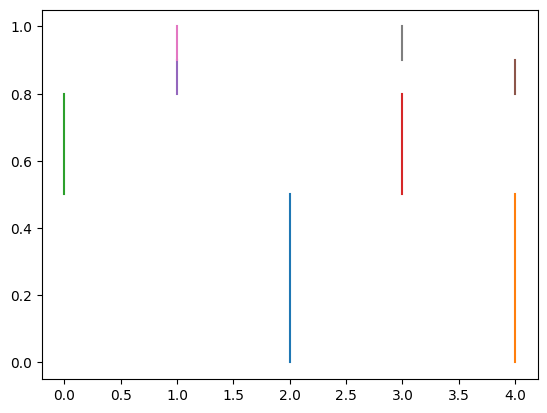

0 | Sample(probability=np.float64(0.4), ids=frozenset({2, 3}))
1 | Sample(probability=np.float64(0.2), ids=frozenset({1, 4}))
2 | Sample(probability=np.float64(0.3), ids=frozenset({0, 4}))
3 | Sample(probability=np.float64(0.1), ids=frozenset({2, 4}))


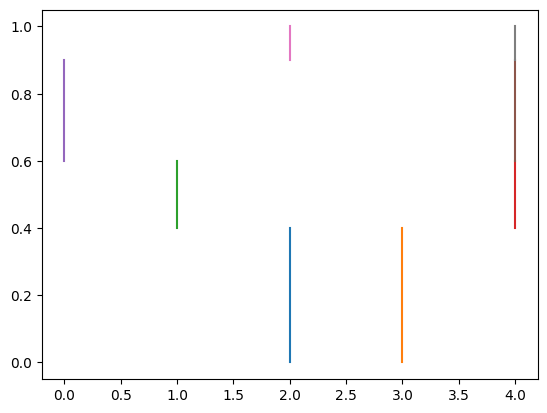

In [ ]:
inclusions = np.array([0.3, 0.2, 0.5, 0.4, 0.6])
AsDesign = Design(inclusions=inclusions)
print("Index | Sample")
print("----------------")
for i, sample in enumerate(AsDesign):
    print(f"{i:5d} | {sample}")
AsDesign.show()



inclusions = np.array([0.3, 0.2, 0.5, 0.4, 0.6])
perm = np.random.permutation(len(inclusions))
shuffled = inclusions[perm]
AsDesign = Design(inclusions=shuffled, perm=perm)
for i, sample in enumerate(AsDesign):
    print(f"{i} | {sample}")
AsDesign.show()